In [3]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg

from matplotlib import pyplot as plt
%matplotlib inline

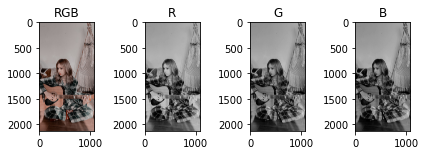

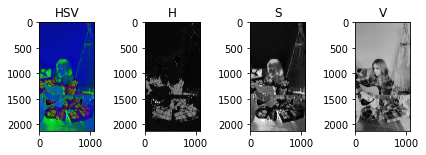

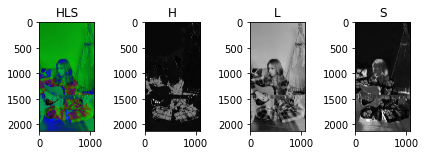

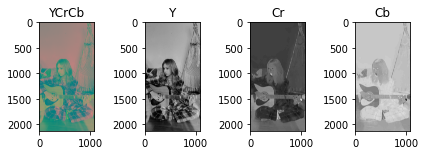

In [4]:
#Lab 2.1
img = cv2.imread('Image2.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# cv2.imwrite('Image_RGB.jpg', img_rgb)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# cv2.imwrite('Image_HSV.jpg', img_hsv)
img_hls = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
# cv2.imwrite('Image_HLS.jpg', img_hls)
img_ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
# cv2.imwrite('Image_YCrCb.jpg', img_ycrcb)
# split = [ r, g, b, hsv_h, hsv_s, hsv_v, hls_h, hls_l, hls_s, y, cr, cb]
# for i in range(0,12):
#   for j in range(0,2):
#     if i < 3 :
#       split[i] = img_rgb[:,:,j]
#     elif i < 6 and i >= 3 :
#       split[i] = img_hsv[:,:,j]
#     elif i < 9 and i >= 6 :
#       split[i] = img_hls[:,:,j]
#     elif i < 12 and i >= 9 :
#       split[i] = img_ycrcb[:,:,j] 
      
r = img_rgb[:,:,0]
g = img_rgb[:,:,1]
b = img_rgb[:,:,2]
hsv_h = img_hsv[:,:,0]
hsv_s = img_hsv[:,:,1]
hsv_v = img_hsv[:,:,2]
hls_h = img_hls[:,:,0]
hls_l = img_hls[:,:,1]
hls_s = img_hls[:,:,2]
y = img_ycrcb[:,:,0]
cr = img_ycrcb[:,:,1]
cb = img_ycrcb[:,:,2]

show = [ img_rgb, r, g,b,img_hsv,hsv_h,hsv_s,hsv_v,img_hls,hls_h,hls_l,hls_s,img_ycrcb,y,cr,cb]
showtext = ["RGB","R","G","B","HSV","H","S","V","HLS","H","L","S","YCrCb","Y","Cr","Cb"]
# for i in range(0,16):
#   plt.subplot(4,4,i+1)
#   plt.title(showtext[i])
#   plt.imshow(show[i],cmap = 'gray')
# plt.tight_layout()

fig = plt.figure(3)
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.title(showtext[i])
  plt.imshow(show[i],cmap = 'gray')
plt.tight_layout()

fig = plt.figure(4)
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.title(showtext[i+4])
  plt.imshow(show[i+4],cmap = 'gray')
plt.tight_layout()

fig = plt.figure(5)
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.title(showtext[i+8])
  plt.imshow(show[i+8],cmap = 'gray')
plt.tight_layout()

fig = plt.figure(6)
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.title(showtext[i+12])
  plt.imshow(show[i+12],cmap = 'gray')
plt.tight_layout()

In [5]:
#Lab 2.2
src1 = cv2.imread('ImageBlend1.jpg') 
src2 = cv2.imread('ImageBlend2.jpg')

h = src1.shape[0]
w = src1.shape[1]
size = (w,h)
fps = 15

In [6]:
#resize and crop
#height and width src1 **must** more than src2
src1 = cv2.imread('ImageBlend1.jpg') 
src2 = cv2.imread('ImageBlend2.jpg')
scale = (src1.shape[0]/src2.shape[0]*100) # % new scale ImageBlend2
dsize = (int(src2.shape[1]*scale/100), int(src2.shape[0]*scale/100))
img_resize = cv2.resize(src2, dsize, interpolation = cv2.INTER_AREA)
src2 = img_resize[ 0:src1.shape[0], 0:src1.shape[1]]
print("ImageBlend1 : ",src1.shape)
print("ImageBlend3 : ",src2.shape)
cv2.imwrite('ImageBlend3.jpg',src2) 

ImageBlend1 :  (720, 1270, 3)
ImageBlend3 :  (720, 1270, 3)


True

In [7]:
img_array = []

for  i in np.arange(0.0, 1.0, 0.01):
   W1 = i
   W2 = 1.0 - W1
   dst = cv2.addWeighted(src1, W1, src2, W2, 0.0)
   img_array.append(dst)

for  i in np.arange(1.0, 0.0, -0.01):
   W1 = i
   W2 = 1.0 - W1
   dst = cv2.addWeighted(src1, W1, src2, W2, 0.0)
   img_array.append(dst)

In [8]:
out = cv2.VideoWriter('activity2.mp4',cv2.VideoWriter_fourcc(*'mp4v'), fps, size)
   
for i in range(len(img_array)):
     out.write(img_array[i])
out.release()

In [9]:
# cap = cv2.VideoCapture('activity2.mp4')
# # Read until video is completed
# while (cap.isOpened()):
#     # Capture frame-by-frame
#     ret, frame = cap.read()
#     if ret == True:
#       #GRAY MODE
#         # gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#         # Display the resulting frame
#         # cv2.imshow('Frame', gray)
#       #NORMAL MODE
#         # Display the resulting frame
#         cv2.imshow('Frame', frame)
#         if cv2.waitKey(25) & 0xFF == ord('q'):
#             break
#     else:
#         break
# # release video capture
# cap.release()

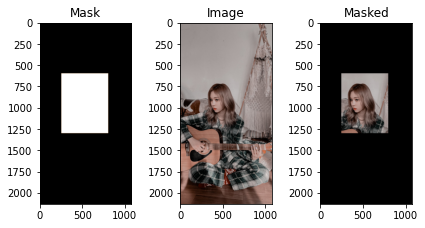

In [10]:
#Lab 2.3

x = np.zeros(img.shape[:2], dtype="uint8")
#image, start_point, end_point, color, thickness
cv2.rectangle(x, (250, 600), (800, 1300), 255, -1)
masked = cv2.bitwise_and(img, img, mask=x)

#Change to RGB for show
x = cv2.cvtColor(x,cv2.COLOR_BAYER_BG2RGB)
masked_rgb = cv2.cvtColor(masked,cv2.COLOR_BGR2RGB)

show2 = [x,img_rgb,masked_rgb]
showtext2 = ["Mask","Image","Masked"]
fig = plt.figure(2)
for i in range(0,3):
  plt.subplot(1,3,i+1)
  plt.title(showtext2[i])
  plt.imshow(show2[i],cmap = 'gray')
plt.tight_layout()
plt.show()